In [72]:
import torch.nn.functional as F
import os
import PIL
import torch
from torchvision import transforms
import torchvision.transforms.functional as TF 
from torchvision.transforms import Compose
from PIL import Image, ImageOps, ImageFilter, ImageEnhance, ImageTransform

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

device = torch.device("cuda")

uniform_samples = torch.distributions.Uniform(torch.full((1, 1, 144), -1.), torch.full((1, 1, 144), 1.))
# Generator and Discriminator classes as before...

# Custom dataset class for loading and preprocessing images


class CustomDataset():
    def __init__(self, root_dir, transform: Compose):
        self.root_dir = root_dir
        self.image_files = os.listdir(root_dir)
        self.transform = transform
        self.images = self._load_images()

    def _load_images(self):
        images = []
        for i in range(len(self.image_files)):
            img_name = os.path.join(self.root_dir, self.image_files[i])
            image = Image.open(img_name).convert("L").copy()
            image = self.transform(image)
            images.append(image)
        return torch.stack(images, 0)

    def __len__(self):
        return len(self.image_files)

    def shuffle(self):
        return self.images[torch.randperm(self.images.size()[0])]
        

def show_data(data, n=6):
    for i in range(n):
        fig, ax = plt.subplots(figsize=(4,4))
        img = data[i]
        img = img.numpy().transpose(1, 2, 0).squeeze()
        ax.imshow(img, cmap='gray')
        plt.show()


data_transform = transforms.Compose([
            transforms.Resize((3300, 4400), transforms.InterpolationMode.NEAREST_EXACT),
            #transforms.RandomRotation(45),
            transforms.CenterCrop(size=(int(3300*0.7), int(4400*0.7))),
            transforms.Lambda(lambda x: TF.adjust_contrast(x,2)),
            transforms.Lambda(lambda x: TF.adjust_brightness(x,1.25)),
            transforms.Lambda(lambda x: TF.adjust_sharpness(x,20)),
            transforms.RandomHorizontalFlip(),
            transforms.Resize((96, 128)),
            transforms.PILToTensor(),
        ])

dataset = CustomDataset(root_dir="../Hazel_Train", transform=data_transform)


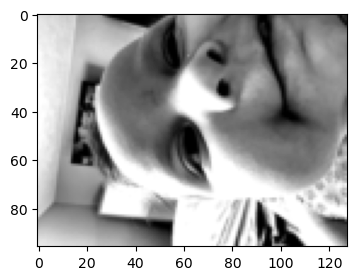

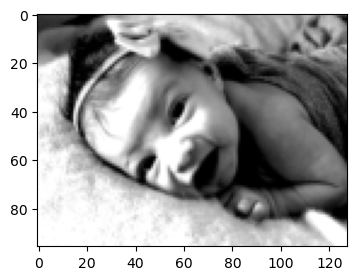

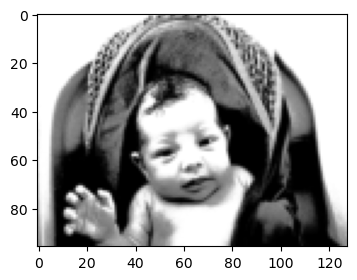

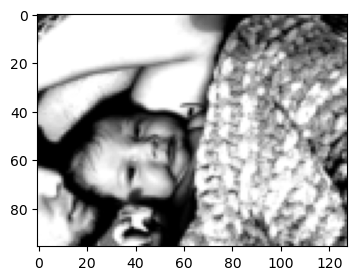

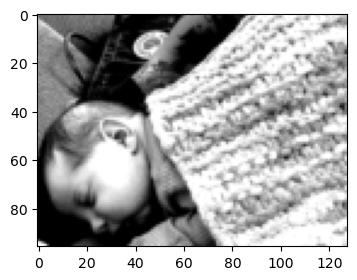

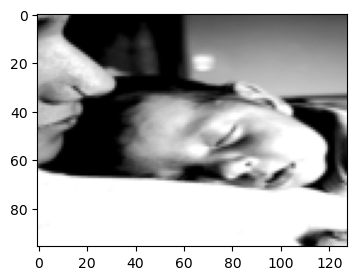

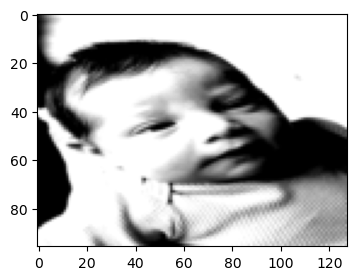

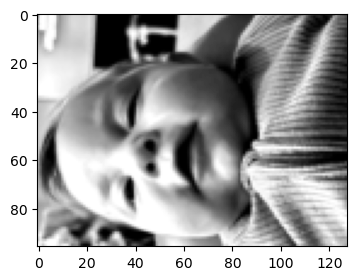

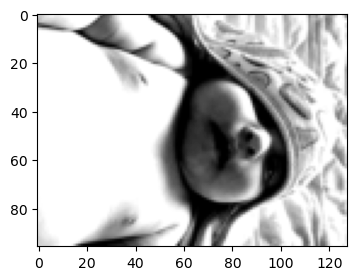

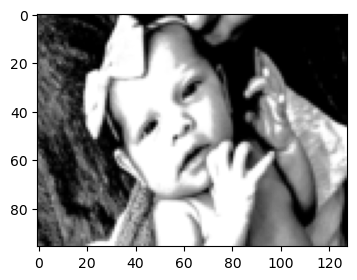

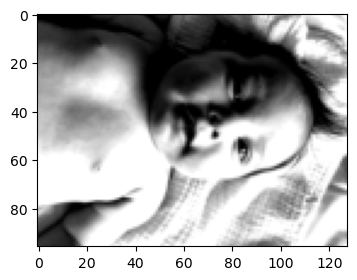

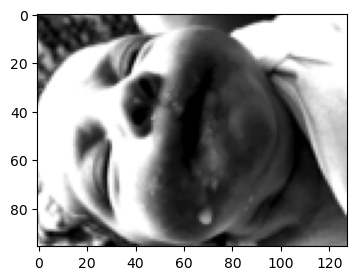

In [73]:

for i in range(1):
    show_data(dataset.shuffle(), 12)

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 12))
im=dataset[5]
ax1.imshow(im, cmap='gray')
im2 = transforms.RandomAdjustSharpness(15, 1.0)(im)
ax2.imshow(im2, cmap='gray')
im3=transforms.RandomAutocontrast(1.0)(im)
#im3 = im.filter(filter=detail)
ax3.imshow(im3, cmap='gray')
plt.show()


In [ ]:
im=dataset[5]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.imshow(im, cmap='gray')
ax2.imshow(im2, cmap='gray')
plt.show()